# Imports

In [35]:
import nina

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

ModuleNotFoundError: No module named 'nina'

$n_i = \int_{E_{i,min}}^{E_{i,max}} \frac{dR}{dE_{det}} \epsilon(E_{det}) dE_{det} = \int_{E_{i,min}}^{E_{i,max}} \int_{E_{min}^+}^{E_{max}^+} dE^+\frac{dR}{dE_{e^+}}R(E^+,E_{det}) \epsilon(E_{det}) dE_{det}$

$n_i=\int_{E_{i,min}}^{E_{i,max}} \int_{E_{\nu,min}}^{E_{\nu,max}} \frac{d\phi(E_\nu)}{dE_{\nu}} P(E_\nu) \int_{E_{min}^+}^{E_{max}^+} dE^+\frac{d\sigma(E_\nu,E^+)}{dE^+} R(E^+,E_{det}) dE_\nu \epsilon(E_{det}) dE_{det}$

$n_i= \int_{E_{\nu,min}}^{E_{\nu,max}} \frac{d\phi(E_\nu)}{dE_{\nu}}   P(E_\nu)  \left( \int_{E_{min}^+}^{E_{max}^+}\frac{d\sigma(E_\nu,E^+)}{dE^+}\left(\int_{E_{i,min}}^{E_{i,max}} R(E^+,E_{det})  \epsilon(E_{det}) dE_{det}\right)dE^+\right) dE_\nu $

$n_i\approx \sum_j \phi_j   P_j  \left( \sum_{k}\frac{d\sigma_{jk}}{\Delta_k}\left(\sum_l^{(i)} R_{kl}  \epsilon_l \Delta_l\right)\Delta_k\right) \Delta_j $

$E_\nu \rightarrow j$

$E^+ \rightarrow k$

$E_{det} \rightarrow l$

or

$n_i=\int_{E_{i,min}}^{E_{i,max}} \left(\int_{E_{min}^+}^{E_{max}^+} \left(\int_{E_{\nu,min}}^{E_{\nu,max}} \frac{d\phi(E_\nu)}{dE_{\nu}} P(E_\nu) \frac{d\sigma(E_\nu,E^+)}{dE^+} dE_\nu\right)   R(E^+,E_{det})  dE^+\right) \epsilon(E_{det})dE_{det}$

# Cross-section

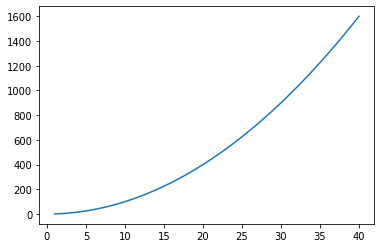

In [2]:
def xsec(Enu):
    return Enu**2

energy = np.linspace(1,40,50)
plt.plot(energy, xsec(energy))
pass

# Flux

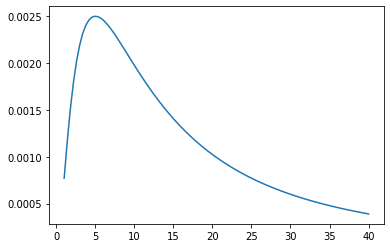

In [3]:
def flux(Enu):
    return 1/(5+Enu)**4

energy = np.linspace(1,40,100)
plt.plot(energy, flux(energy)*xsec(energy))
pass

# Prob

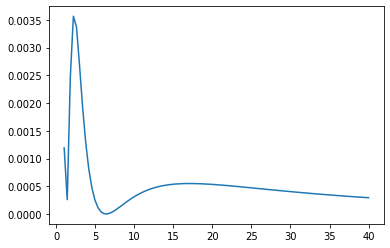

In [4]:
class ProbTeste(nina.Prob):
    def func(self, energy):
        return 1-self.params[0]*np.sin(self.params[1]*self.L/energy)

prob = ProbTeste([1,1], 10)


energy = np.linspace(1,40,100)
plt.plot(energy, flux(energy)*xsec(energy)*prob.calculate(energy))
pass

# Experiment

In [23]:
detector = nina.Detector( xsec = xsec, position = [0,0,0] )
source = nina.Source( flux = flux, position = [10,0,0] )
histogram = nina.Histogram.getUniform(1,10,10)

kamland = nina.Experiment( detector, source, prob, histogram)
kamland.norm = 10**7
events = kamland.simulate()

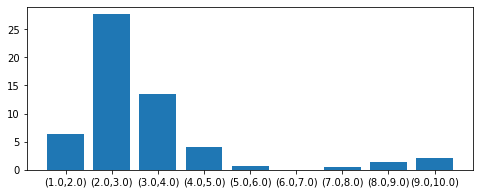

In [25]:
bins = [f"({round(bin.min,1)},{round(bin.max,1)})" for bin in histogram.bins]
plt.figure(figsize=(8,3))
plt.bar(bins, events)
pass

# Analysis

## Fake events

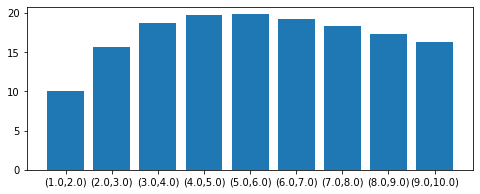

In [29]:
kamland.prob.params=[0,0]
fake_events = kamland.simulate()

bins = [f"({round(bin.min,1)},{round(bin.max,1)})" for bin in histogram.bins]
plt.figure(figsize=(8,3))
plt.bar(bins, fake_events)
pass

## Chi-square

In [80]:
dist = []
for lam in fake_events:
    dist.append(np.random.poisson(lam,size=10000))

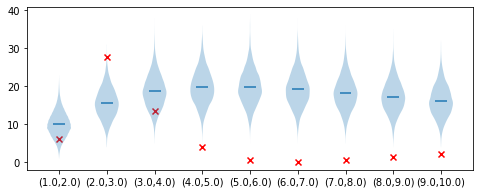

In [87]:
plt.figure(figsize=(8,3))
plt.scatter(bins, events, color='r', marker="x")
plt.violinplot(dist, positions=range(len(events)), showmeans=True, showextrema=False)
pass

In [15]:


def interp(x):
    return x
interp
a = interp
a(10)


10

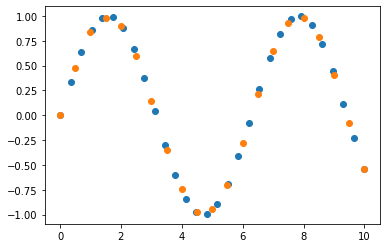

In [24]:
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0,10,30)
y = np.sin(x)

func = interp1d(x,y)
x_novo = np.linspace(0,10,21)
y_interp = func(x_novo)

import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.scatter(x_novo, y_interp)

In [22]:
func(x)

array([ 0.        ,  0.33803442,  0.6362712 ,  0.85959818,  0.98172251,
        0.9882662 ,  0.87845883,  0.6652283 ,  0.37367879,  0.03813513,
       -0.30189827, -0.60638843, -0.83948697, -0.9737506 , -0.99337213,
       -0.89604148, -0.69321762, -0.40877952, -0.07621478,  0.26532292,
        0.57562349,  0.81815446,  0.96436206,  0.9970329 ,  0.91232056,
        0.72019844,  0.44328555,  0.11418355, -0.22836157, -0.54402111])